In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LassoLars, LogisticRegression, Ridge, Lasso, RidgeCV,ElasticNetCV,ElasticNetCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import requests
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [109]:
df= pd.read_csv('./Hotel_Reviews.csv')

In [110]:
df.shape

(515738, 17)

# Dropping reviews that has no positive and no negative reviews 

In [111]:
ind_remove = df[ (df['Positive_Review']=='No Positive') & (df['Negative_Review']=='No Negative') ].index

In [112]:
df.drop(index=ind_remove,inplace=True)

In [113]:
df = df.loc[:100_000,:]

In [114]:
df.shape

(99979, 17)

In [115]:
df = df.reset_index() 

In [116]:
df.drop(['index'], inplace=True, axis=1)

In [117]:
df.isnull().sum()

Hotel_Address                                  0
Additional_Number_of_Scoring                   0
Review_Date                                    0
Average_Score                                  0
Hotel_Name                                     0
Reviewer_Nationality                           0
Negative_Review                                0
Review_Total_Negative_Word_Counts              0
Total_Number_of_Reviews                        0
Positive_Review                                0
Review_Total_Positive_Word_Counts              0
Total_Number_of_Reviews_Reviewer_Has_Given     0
Reviewer_Score                                 0
Tags                                           0
days_since_review                              0
lat                                           37
lng                                           37
dtype: int64

In [118]:
df.columns.values

array(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Tags', 'days_since_review', 'lat', 'lng'], dtype=object)

In [119]:
df.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [120]:
# sns.lmplot(x='Average_Score', y='Reviewer_Score', data=df)

In [121]:
# sns.lmplot(x='Review_Total_Positive_Word_Counts', y='Reviewer_Score', data=df)

In [122]:
# sns.lmplot(x='Review_Total_Negative_Word_Counts', y='Reviewer_Score', data=df)

# Dummying the reviewer nationality column

In [123]:
len(set(df['Reviewer_Nationality']))

197

In [124]:
119+17+2000

2136

In [125]:
df = pd.get_dummies(df,
                          columns=['Reviewer_Nationality'],
                          drop_first=False)

In [126]:
len(df.columns)

213

In [127]:
corr = df.corr()

In [128]:
pd.set_option('display.max_columns', 9999)

In [129]:
corr.head(10)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Reviewer_Nationality_,Reviewer_Nationality_ Abkhazia Georgia,Reviewer_Nationality_ Afghanistan,Reviewer_Nationality_ Albania,Reviewer_Nationality_ Algeria,Reviewer_Nationality_ Andorra,Reviewer_Nationality_ Angola,Reviewer_Nationality_ Antarctica,Reviewer_Nationality_ Antigua Barbuda,Reviewer_Nationality_ Argentina,Reviewer_Nationality_ Armenia,Reviewer_Nationality_ Aruba,Reviewer_Nationality_ Australia,Reviewer_Nationality_ Austria,Reviewer_Nationality_ Azerbaijan,Reviewer_Nationality_ Bahamas,Reviewer_Nationality_ Bahrain,Reviewer_Nationality_ Bangladesh,Reviewer_Nationality_ Barbados,Reviewer_Nationality_ Belarus,Reviewer_Nationality_ Belgium,Reviewer_Nationality_ Belize,Reviewer_Nationality_ Benin,Reviewer_Nationality_ Bermuda,Reviewer_Nationality_ Bhutan,Reviewer_Nationality_ Bosnia and Herzegovina,Reviewer_Nationality_ Botswana,Reviewer_Nationality_ Brazil,Reviewer_Nationality_ British Virgin Islands,Reviewer_Nationality_ Brunei,Reviewer_Nationality_ Bulgaria,Reviewer_Nationality_ Burundi,Reviewer_Nationality_ Cambodia,Reviewer_Nationality_ Cameroon,Reviewer_Nationality_ Canada,Reviewer_Nationality_ Cayman Islands,Reviewer_Nationality_ Central Africa Republic,Reviewer_Nationality_ Chile,Reviewer_Nationality_ China,Reviewer_Nationality_ Colombia,Reviewer_Nationality_ Comoros,Reviewer_Nationality_ Costa Rica,Reviewer_Nationality_ Crimea,Reviewer_Nationality_ Croatia,Reviewer_Nationality_ Cura ao,Reviewer_Nationality_ Cyprus,Reviewer_Nationality_ Czech Republic,Reviewer_Nationality_ Democratic Republic of the Congo,Reviewer_Nationality_ Denmark,Reviewer_Nationality_ Dominican Republic,Reviewer_Nationality_ East Timor,Reviewer_Nationality_ Ecuador,Reviewer_Nationality_ Egypt,Reviewer_Nationality_ El Salvador,Reviewer_Nationality_ Equatorial Guinea,Reviewer_Nationality_ Estonia,Reviewer_Nationality_ Ethiopia,Reviewer_Nationality_ Falkland Islands Malvinas,Reviewer_Nationality_ Faroe Islands,Reviewer_Nationality_ Fiji,Reviewer_Nationality_ Finland,Reviewer_Nationality_ France,Reviewer_Nationality_ French Guiana,Reviewer_Nationality_ Gabon,Reviewer_Nationality_ Gambia,Reviewer_Nationality_ Georgia,Reviewer_Nationality_ Germany,Reviewer_Nationality_ Ghana,Reviewer_Nationality_ Gibraltar,Reviewer_Nationality_ Greece,Reviewer_Nationality_ Guadeloupe,Reviewer_Nationality_ Guam,Reviewer_Nationality_ Guatemala,Reviewer_Nationality_ Guernsey,Reviewer_Nationality_ Guyana,Reviewer_Nationality_ Haiti,Reviewer_Nationality_ Honduras,Reviewer_Nationality_ Hong Kong,Reviewer_Nationality_ Hungary,Reviewer_Nationality_ Iceland,Reviewer_Nationality_ India,Reviewer_Nationality_ Indonesia,Reviewer_Nationality_ Iran,Reviewer_Nationality_ Iraq,Reviewer_Nationality_ Ireland,Reviewer_Nationality_ Isle of Man,Reviewer_Nationality_ Israel,Reviewer_Nationality_ Italy,Reviewer_Nationality_ Ivory Coast,Reviewer_Nationality_ Jamaica,Reviewer_Nationality_ Japan,Reviewer_Nationality_ Jersey,Reviewer_Nationality_ Jordan,Reviewer_Nationality_ Kazakhstan,Reviewer_Nationality_ Kenya,Reviewer_Nationality_ Kosovo,Reviewer_Nationality_ Kuwait,Reviewer_Nationality_ Kyrgyzstan,Reviewer_Nationality_ Laos,Reviewer_Nationality_ Latvia,Reviewer_Nationality_ Lebanon,Reviewer_Nationality_ Liberia,Reviewer_Nationality_ Libya,Reviewer_Nationality_ Liechtenstein,Reviewer_Nationality_ Lithuania,Reviewer_Nationality_ Luxembourg,Reviewer_Nationality_ Macau,Reviewer_Nationality_ Macedonia,Reviewer_Nationality_ Madagascar,Reviewer_Nationality_ Malawi,Reviewer_Nationality_ Malaysia,Reviewer_Nationality_ Maldives,Reviewer_Nationality_ Mali,Reviewer_Nationality_ Malta,Reviewer_Nationality_ Martinique,Reviewer_Nationality_ Mauritania,Reviewer_Nationality_ Mauritius,Reviewer_Nationality_ Mexico,Reviewer_Nationality_ Moldova,Reviewer_Nationality_ Monaco,Reviewer_Nationality_ Mongolia,Revi

# Scikit-Learn TfidfVectorizer

In [130]:
from sklearn.feature_extraction import stop_words

In [131]:
# Instantiate a CountVectorizer with (stop words, max features, N-grams)
tvec_neg = TfidfVectorizer(max_features=1000,stop_words=None,ngram_range=(1,1))
tvec_pos = TfidfVectorizer(max_features=1000,stop_words=None,ngram_range=(1,1))

In [132]:
# Fit the vectorizer on our corpus
tvec_neg.fit(df['Negative_Review'])
tvec_pos.fit(df['Positive_Review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [133]:
# Transform the corpus.
neg_reviews = tvec_neg.transform(df['Negative_Review'])
pos_reviews = tvec_pos.transform(df['Positive_Review'])

In [134]:
type(neg_reviews)

scipy.sparse.csr.csr_matrix

In [135]:
# Convert the negative comments vectors (columns) into a DataFrame.

neg_reviews_df  = pd.DataFrame(neg_reviews.toarray(),
                          columns=tvec_neg.get_feature_names())
neg_reviews_df

00   10  100        11   12   15   20   24   25       2nd   30  \
0      0.048716  0.0  0.0  0.102403  0.0  0.0  0.0  0.0  0.0  0.054238  0.0   
1      0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
2      0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
3      0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
4      0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
...         ...  ...  ...       ...  ...  ...  ...  ...  ...       ...  ...   
99974  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
99975  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
99976  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
99977  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
99978  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

        40   50      able     about  above  absolutely   ac  acceptable  \
0      0.0  0.0  0.045714  0.000000    0.0         0.0  0.0         0.0   
1      0.0  0.0  0.000000  0.000000    0.0         0.0  0.0         0.0   
2      0.0  0.0  0.000000  0.000000    0.0         0.0  0.0         0.0   
3      0.0  0.0  0.000000  0.055358    0.0         0.0  0.0         0.0   
4      0.0  0.0  0.000000  0.000000    0.0         0.0  0.0         0.0   
...    ...  ...       ...       ...    ...         ...  ...         ...   
99974  0.0  0.0  0.000000  0.000000    0.0         0.0  0.0         0.0   
99975  0.0  0.0  0.000000  0.000000    0.0         0.0  0.0         0.0   
99976  0.0  0.0  0.000000  0.000000    0.0         0.0  0.0         0.0   
99977  0.0  0.0  0.000000  0.000000    0.0         0.0  0.0         0.0   
99978  0.0  0.0  0.000000  0.000000    0.0         0.0  0.0         0.0   

       access  account  across  actually  added  additional  adequate  \
0         0.0      0.0     0.0       0.0    0.0         0.0       0.0   
1         0.0      0.0     0.0       0.0    0.0         0.0       0.0   
2         0.0      0.0     0.0       0.0    0.0         0.0       0.0   
3         0.0      0.0     0.0       0.0    0.0         0.0       0.0   
4         0.0      0.0     0.0       0.0    0.0         0.0       0.0   
...       ...      ...     ...       ...    ...         ...       ...   
99974     0.0      0.0     0.0       0.0    0.0         0.0       0.0   
99975     0.0      0.0     0.0       0.0    0.0         0.0       0.0   
99976     0.0      0.0     0.0       0.0    0.0         0.0       0.0   
99977     0.0      0.0     0.0       0.0    0.0         0.0       0.0   
99978     0.0      0.0     0.0       0.0    0.0         0.0       0.0   

       advance  advertised  advised     after  afternoon     again  against  \
0          0.0         0.0      0.0  0.035544        0.0  0.038791      0.0   
1          0.0         0.0      0.0  0.000000        0.0  0.000000      0.0   
2          0.0         0.0      0.0  0.000000        0.0  0.000000      0.0   
3          0.0         0.0      0.0  0.055632        0.0  0.000000      0.0   
4          0.0         0.0      0.0  0.071836        0.0  0.156798      0.0   
...        ...         ...      ...       ...        ...       ...      ...   
99974      0.0         0.0      0.0  0.000000        0.0  0.000000      0.0   
99975      0.0         0.0      0.0  0.000000        0.0  0.000000      0.0   
99976      0.0         0.0      0.0  0.000000        0.0  0.000000      0.0   
99977      0.0         0.0      0.0  0.000000        0.0  0.000000      0.0   
99978      0.0         0.0      0.0  0.000000        0.0  0.000000      0.0   

       air  aircon  airport  alarm       all  almost   already      also  \
0      0.0     0.0      0.0    0.0  0.029534     0.0  0.000000  0.000000   
1      0.0     0.0      0.0    0.0  0.000000     0.0  0.000000  0.000000   
2      0.0     0.0      0.0    0.0  0.000000     0.0  0.000000  0.000000   
3      0.0     0.0      0.0    0.

In [136]:
# Convert the positive comments vectors (columns) into a DataFrame.

pos_reviews_df  = pd.DataFrame(pos_reviews.toarray(),
                          columns=tvec_neg.get_feature_names())
pos_reviews_df

00   10  100   11   12   15   20   24   25  2nd   30   40   50  able  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
99974  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
99975  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
99976  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
99977  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
99978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

       about  above  absolutely   ac  acceptable  access  account  across  \
0        0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
1        0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
2        0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
3        0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
4        0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
...      ...    ...         ...  ...         ...     ...      ...     ...   
99974    0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
99975    0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
99976    0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
99977    0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   
99978    0.0    0.0         0.0  0.0         0.0     0.0      0.0     0.0   

       actually  added  additional  adequate  advance  advertised  advised  \
0           0.0    0.0         0.0       0.0      0.0         0.0      0.0   
1           0.0    0.0         0.0       0.0      0.0         0.0      0.0   
2           0.0    0.0         0.0       0.0      0.0         0.0      0.0   
3           0.0    0.0         0.0       0.0      0.0         0.0      0.0   
4           0.0    0.0         0.0       0.0      0.0         0.0      0.0   
...         ...    ...         ...       ...      ...         ...      ...   
99974       0.0    0.0         0.0       0.0      0.0         0.0      0.0   
99975       0.0    0.0         0.0       0.0      0.0         0.0      0.0   
99976       0.0    0.0         0.0       0.0      0.0         0.0      0.0   
99977       0.0    0.0         0.0       0.0      0.0         0.0      0.0   
99978       0.0    0.0         0.0       0.0      0.0         0.0      0.0   

       after  afternoon  again  against  air    aircon  airport  alarm  all  \
0        0.0   0.000000    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   
1        0.0   0.000000    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   
2        0.0   0.000000    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   
3        0.0   0.215218    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   
4        0.0   0.000000    0.0      0.0  0.0  0.564564      0.0    0.0  0.0   
...      ...        ...    ...      ...  ...       ...      ...    ...  ...   
99974    0.0   0.000000    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   
99975    0.0   0.000000    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   
99976    0.0   0.000000    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   
99977    0.0   0.000000    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   
99978    0.0   0.000000    0.0      0.0  0.0  0.000000      0.0    0.0  0.0   

         almost  already      also  although  always   am   amazing  \
0      0.000000      0.0  0.000000       0.0     0.0  0.0  0.000000   
1      0.134698      0.0  0.186259       0.0     0.0  0.0  0.152882   
2      0.000000      0.

In [137]:
pos_reviews_df.shape,neg_reviews_df.shape

((99979, 1000), (99979, 1000))

In [138]:
import sys 

In [139]:
sys.getsizeof(neg_reviews_df)/1e6

799.832152

(array([22878., 13976., 11231.,  8660.,  7752., 13086.,  8563.,  5527.,
         6132.,  2174.]),
 array([0.        , 0.21400662, 0.42801323, 0.64201985, 0.85602647,
        1.07003308, 1.2840397 , 1.49804631, 1.71205293, 1.92605955,
        2.14006616]),
 <a list of 10 Patch objects>)

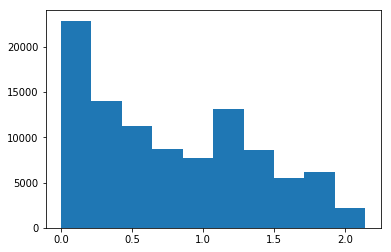

In [140]:
plt.hist(df['Reviewer_Score'].map(lambda x : np.log(11-x)))

(array([  777.,  1381.,  2380.,  3768.,  2517.,  6675., 11634., 14027.,
        19955., 36865.]),
 array([ 2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,  8.5 ,
         9.25, 10.  ]),
 <a list of 10 Patch objects>)

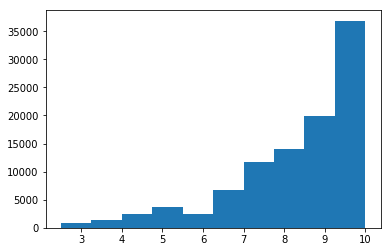

In [141]:
plt.hist(df['Reviewer_Score'])

In [142]:
rev_score = df.Reviewer_Score.unique()

In [143]:
df['Reviewer_Score'].sort_values().unique()

array([ 2.5,  2.9,  3. ,  3.1,  3.3,  3.5,  3.8,  4. ,  4.2,  4.4,  4.5,
        4.6,  5. ,  5.4,  5.5,  5.6,  5.8,  6. ,  6.3,  6.5,  6.7,  6.9,
        7. ,  7.1,  7.5,  7.9,  8. ,  8.1,  8.3,  8.5,  8.8,  9. ,  9.2,
        9.4,  9.5,  9.6, 10. ])

# Merging pos and neg reviews with the main Dataframe



In [144]:
df = pd.concat([df, neg_reviews_df, pos_reviews_df ], axis=1)

In [145]:
df.shape

(99979, 2213)

In [146]:
df.columns[:20]

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Reviewer_Nationality_ ',
       'Reviewer_Nationality_ Abkhazia Georgia ',
       'Reviewer_Nationality_ Afghanistan ', 'Reviewer_Nationality_ Albania '],
      dtype='object')

# Creating X and y

In [147]:
drop_list = ['Hotel_Address', 
            'Review_Date',
            'Hotel_Name',
            'days_since_review',
            'lat',
            'lng',
             'Tags',
            'Reviewer_Score',
            'Negative_Review',
            'Positive_Review',

            ]
X = df.drop( drop_list, axis=1)
y = df['Reviewer_Score']

In [148]:
X.columns

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Nationality_ ',
       'Reviewer_Nationality_ Abkhazia Georgia ',
       'Reviewer_Nationality_ Afghanistan ', 'Reviewer_Nationality_ Albania ',
       ...
       'worth', 'would', 'wouldn', 'wrong', 'year', 'years', 'yet', 'you',
       'young', 'your'],
      dtype='object', length=2203)

In [149]:
X.shape

(99979, 2203)

In [150]:
y.shape

(99979,)

# Spliting the train and test datasets

In [151]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                             y,
                                                             test_size=0.25,
                                                             random_state=42)

In [152]:
X_train.shape

(74984, 2203)

In [153]:
X_test.shape

(24995, 2203)

In [154]:
y_train.shape

(74984,)

In [155]:
y_test.shape

(24995,)

# Scaling the data

In [156]:
# Instantiate Standard Scaler
ss = StandardScaler()

In [157]:
X_train_scaled = ss.fit_transform(X_train)

In [158]:
X_test_scaled = ss.transform(X_test)

# Performing the linear regression (without Regularization)

In [159]:
# Instantiate linear regression model without regularization.
lr = LinearRegression()

In [160]:
# Fit linear regression model.
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
# Generate predictions for test data from linear regression model.
y_preds_test = lr.predict(X_test_scaled)

In [162]:
# lr_preds_train.shape

In [163]:
# Calculating R^2 using the train data
y_preds_train = lr.predict(X_train_scaled)
r2_score(y_train, y_preds_train)

0.6141583840222685

In [164]:
# Let's estimate what our model's R^2 might be on the "new" test data
r2_score(y_test, y_preds_test)

-1.2222169111544506e+19

In [165]:
# The results below tell us that we need to regularize!
max(y_preds_test),min(y_preds_test)

(618816793132.5052, 0.4972669281532518)

# Regularization using Ridge Regression

In [166]:
# Instantiate.
ridge_model = Ridge(alpha=5_000)

# Fit.
ridge_model.fit(X_train_scaled, y_train)

# Evaluate model using R2.
print(ridge_model.score(X_train_scaled, y_train))
print(ridge_model.score(X_test_scaled, y_test))

0.6127684398468747
0.583242601501911


# Regularization using Lasso Regression

In [167]:
# # Set up a list of Lasso alphas to check.
# l_alphas = np.logspace(-5, 5, 100)

# Cross-validate over our list of Lasso alphas.
lasso_model = LassoCV(eps=1e-2)

# Fit model using best ridge alpha
lasso_model = lasso_model.fit(X_train_scaled, y_train)

# # Here is the optimal value of alpha
# lasso_model.alpha_

print(lasso_model.score(X_train_scaled, y_train))
print(lasso_model.score(X_test_scaled, y_test))

0.5932301005208415
0.5768635646758109


# Regularization using ElasticNet Regression (Ridge + Lasso)


In [168]:
# # Set up a list of alphas to check.
# enet_alphas = np.linspace(0.5, 1, 10)

# # Set up our l1 ratio. (What does this do?)
# enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV (l1_ratio=0.5,eps=1e-2)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train_scaled, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test_scaled)
enet_model_preds_train = enet_model.predict(X_train_scaled)

# Evaluate model.
print(r2_score(y_train, enet_model_preds_train))
print(r2_score(y_test, enet_model_preds))

0.593206677213665
0.5768866926714178


# Gaussian Naive Bayes

In [169]:
# We fit Gaussian Naive Bayes because TF-IDF brings back a float rather than integer 
# counts or just zeros and ones (thereby precluding use of Multinomial or Bernoulli 
# Naive Bayes.)

In [170]:
# gnb = GaussianNB()

# gnb.fit(X_train, y_train)
# gnb.score(X_train_tf, y_train), gnb.score(X_test_tf, y_test)

# Predicted vs. actual reviews 

Text(0.5, 0, 'Actual Score')

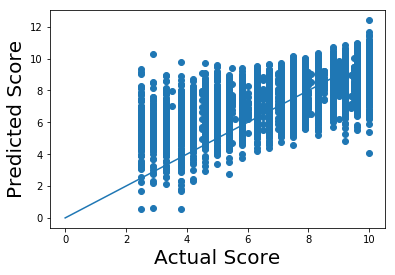

In [171]:
plt.scatter(y_test,enet_model_preds)
plt.plot(range(10))
plt.ylabel('Predicted Score', fontsize=20)
plt.xlabel('Actual Score', fontsize=20)

In [172]:
abs_error = abs(y_test - enet_model_preds)
abs_error.sort_values()

17364    0.000061
29186    0.000088
40511    0.000104
15351    0.000132
54650    0.000146
           ...   
39625    5.988148
17832    6.530158
27519    6.635307
50273    6.864410
96620    7.390671
Name: Reviewer_Score, Length: 24995, dtype: float64

In [173]:
max(abs_error)

7.390670688126329

In [174]:
df['Negative_Review'][96642]

' The rooms are small as you might expect but more than compensated for by the space downstairs '

In [175]:
df['Positive_Review'][96642]

' This hotel has a great feel to it The lounge and bar is welcoming and comfortable and has a great buzz about it Everything feels well designed and stylish The room was clean and comfortable and surprisingly quiet and we loved the iPad controls '

In [176]:
df['Reviewer_Score'][96642]

8.8

In [177]:
# enet_model_preds_train[96642]

IndexError: index 96642 is out of bounds for axis 0 with size 74984

In [ ]:
enet_model_preds_train.shape

In [ ]:
enet_model_preds.shape

# Predicted reviews vs. Residuals

In [178]:
resid = y_preds_train - y_train

Text(0.5, 0, 'Actual Score')

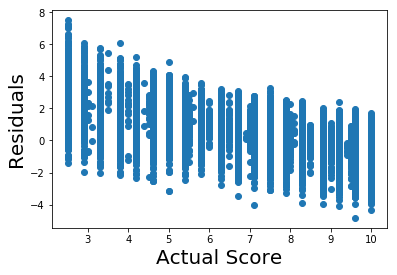

In [179]:
plt.scatter(y_train, resid)
plt.ylabel('Residuals', fontsize=20)
plt.xlabel('Actual Score', fontsize=20)